# Introduction to Prediction!

One of the most important and interesting aspects of data science is making predictions about the future. Can we predict temperatures a few decades from now by analyzing historical data about climate change and pollution? Based on a person's social media profile, what conclusions can we draw about their interests? How can we use a patient's medical history to judge how well he or she will respond to a treatment?

So far, you learned a bunch of data science techniques to manipulate tables and make cool visualizations out of them. Today, we will study concepts of correlation and regression to make predictions in one outcome based on another factor (or factors). Today, we will be putting these skills together to study relationships between race, environmental factors, and health outcomes. Specifically, we will **predict health outcomes (cardiovascular disease, asthma, etc.) based on an environmental factor and race**. We will interpret the correlation coefficients and visualizations of predictions.


### Table of Contents

[The Data](#section_data)

[Part I: Correlation](#section_review)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1 - [Correlation Coefficient](#subsection_1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 2 - [Linear Regression](#subsection_2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3 - [Coefficient of Determination](#subsection_3)


[Part II: Simple Linear Regression](#section_linreg)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 4 - [Pollution vs. Asthma](#subsection_4)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 5 - [Hispanic % vs. Asthma](#subsection_5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 6 - [You Try!](#subsection_6)

[Part III: Multiple Regression!!](#section_multreg)

[Peer Consulting Information](#section_pc)




### Let's get started! 
Run the cell below to import the tools we'll use in this notebook. Don't worry about getting an output -- simply run the cell!

In [4]:
import datascience as ds
import numpy as np
import pandas as pd
import matplotlib.pyplot as plots
import scipy as sp
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as sm


# The Data <a id='section_data'></a>

We will be using data from the website of the Office of Environmental Health Hazard Assessment. The file includes environmental and population data across different counties of California. In order to analyze the data, we must first import it to our Jupyter notebook and create a table. We will call this table `ces_data`.


In [6]:
ces_data = ds.Table.read_table("data/ces_data.csv")
ces_data.take(np.arange(40,50))

Census Tract,CES 3.0 Score,CES 3.0 Percentile,CES 3.0 Percentile Range,Total Population,California County,Children < 10 (%),Pop 11-64 years (%),Elderly > 65 (%),Hispanic (%),White (%),African American (%),Native American (%),Asian American (%),Other (%),ZIP,Nearby City (to help approximate location only),Longitude,Latitude,CES 3.0 Percentile,CES 3.0 Percentile Range,SB 535 Disadvantaged Community,Ozone,Ozone Pctl,PM2.5,PM2.5 Pctl,Diesel PM,Diesel PM Pctl,Drinking Water,Drinking Water Pctl,Pesticides,Pesticides Pctl,Tox. Release,Tox. Release Pctl,Traffic,Traffic Pctl,Cleanup Sites,Cleanup Sites Pctl,Groundwater Threats,Groundwater Threats Pctl,Haz. Waste,Haz. Waste Pctl,Imp. Water Bodies,Imp. Water Bodies Pctl,Solid Waste,Solid Waste Pctl,Pollution Burden,Pollution Burden Score,Pollution Burden Pctl,Asthma,Asthma Pctl,Low Birth Weight,Low Birth Weight Pctl,Cardiovascular Disease,Cardiovascular Disease Pctl,Education,Education Pctl,Linguistic Isolation,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
6.03723e+09,71.53,99.5,95-100% (highest scores),2068,Los Angeles,17.1,76.5,6.4,89.1,1.7,6.1,0.2,2.6,0.2,90021,Los Angeles,-118.25,34.0245,99.5,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,41.684,94.19,664.07,78.57,0,0,5941.16,84.47,2289.68,93.38,55.6,96.64,4.6,28.85,3.55,95.14,7,71.61,24.7,98.7,73.35,9.03,99.43,87.25,88.14,6.16,79.28,9.3,66.56,59.2,98.02,33,96.01,79.3,98.1,4.1,6.94,24.2,74.38,76.34,7.92,88.88
6.03724e+09,71.36,99.48,95-100% (highest scores),3454,Los Angeles,19.3,74.1,6.6,74.8,0.7,24,0,0.1,0.3,90001,Los Angeles,-118.263,33.973,99.48,95-100% (highest scores),Yes,0.046,53.02,12.05,81.66,26.33,79.39,664.07,78.57,0,0,5153.31,80.77,1289.16,77.92,22.7,85.63,14.5,59.3,0.675,82.3,0,0,4.75,70.62,62.84,7.74,94.54,72.52,80.31,7.41,93.64,10.79,81.41,50.4,94.36,22.5,87.65,72.2,94.47,17.6,91.72,35.8,95.11,88.89,9.22,98.71
6.019e+09,71.34,99.47,95-100% (highest scores),6369,Fresno,18.4,73.2,8.4,58.3,22.5,8.1,0.9,7.9,2.4,93728,Fresno,-119.833,36.7573,99.47,95-100% (highest scores),Yes,0.062,91.1,15.4,97.22,38.25,91.89,756.9,87.13,0.02,11.57,3657.29,75.75,827.41,58.83,6.25,48.98,10.5,50.78,0.31,69.73,0,0,5,73.54,65.11,8.02,96.23,91.21,89.73,8.44,98.09,8.81,61,42.1,88.83,19.3,83.22,80.7,98.58,21.6,96.99,24.6,75.53,85.78,8.9,97.3
6.07701e+09,71.3,99.46,95-100% (highest scores),6006,San Joaquin,19.3,75,5.7,29.8,22.5,10.1,0.3,33.1,4.3,95330,Lathrop,-121.303,37.8447,99.46,95-100% (highest scores),Yes,0.05,64.8,12.05,81.66,13.467,40.76,1050.74,99.11,1994.23,92.49,1144.8,61.52,1088.07,71.25,34,92.28,290.05,99.74,3.01,94.51,11,89.54,14.55,94.6,80.1,9.87,99.98,65.67,74.73,6.3,81.93,10.67,80.01,18.4,58.97,13.9,72.04,34.7,52.09,11.3,65.55,18.8,53.71,69.68,7.23,79.47
6.0372e+09,71.05,99.45,95-100% (highest scores),4839,Los Angeles,20.1,74,5.9,95.8,1,1.1,0.3,1.5,0.3,90033,Los Angeles,-118.196,34.0591,99.45,95-100% (highest scores),Yes,0.046,53.02,12.89,92.89,31.02,86.68,527.51,55.68,0,0,6735.29,87.4,2969.91,97.28,9.8,61.51,41.3,88.28,0.66,81.98,6,63.17,5.5,75.64,69.75,8.59,98.57,76.55,82.86,5.17,57.03,8.65,58.86,57.7,97.45,26.8,92.03,76.1,96.96,14.9,84.1,36.4,95.71,79.75,8.27,92.47
6.03753e+09,71.03,99.43,95-100% (highest scores),2213,Los Angeles,16.5,76,7.5,95.2,2.1,0.8,0.2,1.5,0.2,90063,Los Angeles,-118.184,34.0592,99.43,95-100% (highest scores),Yes,0.046,53.02,12.47,83.99,31.02,86.68,647.12,72.91,0,0,8000,90.15,1829.52,88.8,29.6,90.26,40,87.8,0.5,76.85,0,0,10,89.46,68.25,8.41,98.06,54.46,62.24,8,96.57,10.53,78.62,46.4,92.01,20.8,85.63,54.3,78.3,19,94.11,22.5,68.95,81.47,8.45,94.22
6.07300e+09,70.91,99.42,95-100% (highest scores),2227,San Diego,17.3,76.2,6.5,90.3,5.4,1.8,0.2,1.4,0.9,92113,San Diego,-117.141,32.6949,99.42,95-100% (highest scores),Yes,0.038,22.34,11.21,66.23,110.8,99.65,228.07,22.24,0,0,1176.63,61.84,1144.32,73.37,27.75,89.49,93.3,96.79,5.56,97.37,16,97.26,13.5,93.61,64.56,7.95,95.82,127.1,97.23,5.4,63.17,9.63,70.78

Notice that a lot of the entries in the Pesticides column above are 0's. When dealing with large datasets, we will often encounter **missing** values. These values are simply empty values that appear when we do not have a value available for a particular record. It is important to clean these meaningless values to carry out analysis of the dataset. Much of data science consists of **cleaning data** which includes **renaming columns**, **reducing the table size to include only the columns of interest**, and **removing missing values**.  There are various methods of dealing with missing values -- for our purposes, it is safe to simply remove these values from our table. 

**We have done this for you**: simply run the cell below to save a clean version of the data as `clean_ces_data`. From this point forward, we'll use this cleaned CES data to run our analysis.

In [8]:
clean_ces_data = ds.Table.read_table("data/cleaned_data_new.csv")

clean_ces_data

census_tract,hispanic,white,african_american,native_american,asian_american,other,unemployment,poverty,ces_pollution_score,ozone,pesticides,tox_release,asthma,cardiovascular_disease,low_birth_weight
6.019e+09,65.3,4.2,24.6,0.5,3.5,1.8,17.6,76.3,94.09,0.065,2.75,18552,131.64,14.13,7.44
6.071e+09,91.1,5.8,0.7,0.3,1.4,0.7,12.3,72.5,90.68,0.062,1.37,7494.24,60.66,12.94,7.04
6.019e+09,63.6,5.3,18.9,0.6,9.8,1.8,16.1,86.8,85.97,0.062,3.03,12454.9,142.12,14.96,10.16
6.077e+09,57.4,6,12.5,0.3,20.9,2.8,19.6,61.3,82.49,0.046,12.93,2387.78,142.17,14.72,6.23
6.019e+09,71.8,21.4,1.2,0.5,4.5,0.6,18.6,66.4,82.03,0.065,3518.41,21790.7,90.48,12.82,4.5
6.0372e+09,98.1,1.2,0.1,0.1,0.2,0.3,11.6,66.4,80.73,0.046,0,39040.2,68.74,10.4,7.35
6.077e+09,51.8,16.4,16.4,1.3,9.9,4.1,14.4,76.2,80.18,0.046,172.49,707.536,169.56,12.7,8.36
6.019e+09,52.7,2.7,28.7,0.4,14.3,1.2,20,74.5,80.13,0.065,1435.93,6996.96,142.28,14.96,7.83
6.03721e+09,79.3,8.9,4.1,0.1,7.2,0.5,28.5,75.7,79.03,0.046,0,10378.2,58.03,7.24,6.71
6.019e+09,78,9.1,5.8,0.8,5.3,0.9,23.5,83.4,78.53,0.065,114.96,125384,107.8,14.75,4.79


Since we removed some records, the **clean_ces_data** table would have fewer rows than the original. How many missing values were in our original table? Find out by comparing the lengths of the two tables!

In [9]:
length_of_original = len(ces_data)
length_of_cleaned = len(clean_ces_data)
difference = length_of_original - length_of_cleaned

difference

52

---

# Part I: Correlation<a id='section_review'></a>

We'll provide an overview of the concepts we covered in lecture. If you feel confident about the material on correlation (r), regression and coefficient of determination (r-squared), feel free to skip ahead! It is important to have a solid understanding of these concepts -- they are at the heart of the later parts of this lab. Make sure to ask any questions you have to clarify these concepts so you can get the most out of this lab!


**Resources:**
- If you need a more comprehensive review than what we offer here, we've attached [the lecture notebook here](https://tinyurl.com/y4ke2kv6). 

- This lab utilized our Jupyter Notebook skills we developed last week in section. It's a good idea to have the [Introduction to Jupyter Notebook Lab](https://tinyurl.com/y4fru2ro) open for your reference throughout this lab.

## 1. The correlation coefficient - r<a id='subsection_1'></a>

You came across this number last time in the lecture notebook. You already know that it's just a number between -1 and 1 that tells you:
1. **What the relationship between two variables looks like** and 
2. **How strong that relationship is**.

![image](images/correlation-examples.svg)

We defined functions that help us calculate the correlation coefficient in lecture. Don't worry about how it is defined -- simply run the cell below!

In [6]:
def standard_units(xyz): #helps us define the correlation function
    return (xyz - np.mean(xyz))/np.std(xyz) 

#Finds the correlation between two columns of a table!
def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

We can use our `correlation()` function to calculate the correlation coeffient between any two variables in a table. Below is an example of how to use this: from the `clean_ces_data` table, we will use the `hispanic` and `asthma` columns to see the relationship between these two variables.

In [7]:
correlation(clean_ces_data, 'hispanic', 'asthma')

0.3590919232423712

### Interpreting r
So, we get a correlation coefficient of **0.359** from our calculation. What does this value mean regarding the relationship between the concentration of hispanic people and the frequency of asthma attacks in a census tract?

- The value of the correlation coefficient is **positive**. This means that there is some sort of positive correlation between these variables: as the value of one variable increases, the other increases as well.

- We can infer that places with a higher proportion of Hispanics **tend to have** a higher number of reported asthma attacks. 

- The value is not that close to 1 - we can only say that there is a **weak** positive relationship between the proportion of Hispanics and frequency of asthma attacks.

### You Try:

Pick a race of your choice and calculate the correlation coefficient with cardio vascular disease.

In [8]:
correlation(...,...,...)

AttributeError: 'ellipsis' object has no attribute 'column'

**Question 2: Interpret this value:**

*Your Answer Here*

## 2. Prediction Using Simple Linear Regression<a id='subsection_2'></a>

Linear regression is really just a term for **making predictions using lines**. With two variables, linear regression is just a plain old line:

$$Y = mX+b$$

![image](http://onlinestatbook.com/2/regression/graphics/gpa.jpg)

In the example above:
- `Y` is what you are predicting (e.g. University GPA) and
- `X` is what you are basing the prediction off of (e.g. High School GPA)

So, all we need to make this line are two values:
- the slope (`m`) of the line and
- the intercept (`b`) of the line!

If you recall from your algebra classes:

- the **y-intercept**  is just what the Y-value is expected to be when X = 0 (where the line crosses the y-axis), and 
- the **slope** tells you how much the Y-value changes when the X-value changes. 

In other words, the **slope** is highly dependent on the **relationship** between X and Y -- it is dependent on the **the correlation coefficient**.

That's right: **we need the correlation coefficient in order to find the equation for the regression line.**

You don't need to know how any of the following functions are defined: we've given you everything you need to calculate the slope and intercept of the regression line -- all you need to do is to **run the cell below**, and we will show you how to use the functions.

In [9]:
def standard_units(xyz): #ignore this function!
    return (xyz - np.mean(xyz))/np.std(xyz) 

def correlation(table, label_x, label_y):
    return np.mean(standard_units(table.column(label_x))*standard_units(table.column(label_y)))

# We use these function to construct the regression line. As you can see, correlation is used to 
# evaluate the slope of the regression line below.

def slope(table, label_x, label_y):
    r = correlation(table, label_x, label_y) # correlation function used in slope!
    return r*np.std(table.column(label_y))/np.std(table.column(label_x))

def intercept(table, label_x, label_y):
    return np.mean(table.column(label_y)) - slope(table, label_x, label_y)*np.mean(table.column(label_x))

Suppose we want to find the equation of the regression line for the variables in the previous section - Race & Disease. We pick the same example again - Hispanic & Asthma.

In [10]:
slope_of_reg_line = slope(clean_ces_data, "hispanic", "asthma")
slope_of_reg_line

0.41220490076911265

In [11]:
intercept_of_reg_line = intercept(clean_ces_data, "hispanic", "asthma")
intercept_of_reg_line

37.19143315337998

**Question:** Now we have the slope (m) and the interceipt (b) of the the regression line. Given the values we just calculated above, what is the equation of the regression line?

 *YOUR ANSWER HERE*

Now that we have the regression line, we can **plot it over our scatter plot** to visualize the prediction line on top of the actual data. The code cell below takes our slope and intercept, creates the function above (don't worry about how it is implemented). We can use this function to draw the regression line on top of our scatter plot!

In [12]:
# defining the equation in Python!
y = lambda x: slope_of_reg_line*x+intercept_of_reg_line 

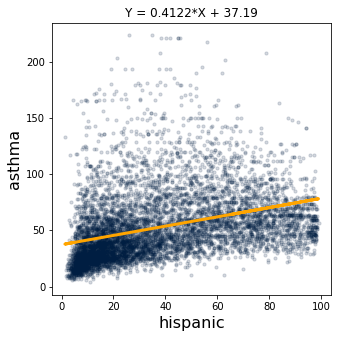

In [13]:
clean_ces_data.scatter("hispanic", "asthma", alpha = .16, s = 10) #normal scatter plot
plots.plot(clean_ces_data.column('hispanic'), y(clean_ces_data.column('hispanic')), c = 'orange', lw = 3) #drawing the regression line
plots.title("Y = 0.4122*X + 37.19");

The gold line above is the equation of the line you derived: <span style='color: orange'>$Y = 0.4122*X + 37.19$</span>. Amazingly, this simple line created by the equation in yellow is the **best** linear predictor of the data: out of all the infinitely many possible combinations of slopes and intercepts, the one we get from our functions predicts our data the best. If you know that a census tract is 80% hispanic, how many incidents of asthma would you guess that census tract to report? What if a census tract is 20% hispanic?

Conveniently, the `.scatter()` function has a setting that allows us to draw the regression line within the scatterplot (without doing any calculations!): all we do is to specify `fit_line = True`. Run the cell below and compare it to the plot above.

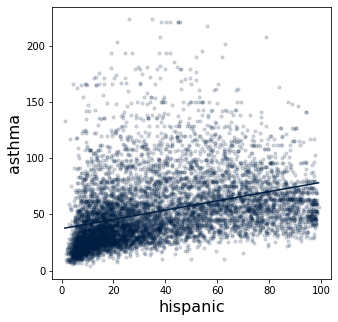

In [14]:
clean_ces_data.scatter("hispanic", "asthma", fit_line=True, alpha = .16, s = 10)

## 3. Coefficient of Determination (R-Squared)<a id='subsection_3'></a>

### How Good is our Predictive Model?

We know the following:
* How to assess the relationship between two variables (correlation coefficient)
* How to find the linear regression equation and use it to make **predictions**

But what if we want to assess how **effective** our linear regression model is? In other words, how do we evaluate how "good" our prediction is?

That is where the **Coefficient of Determination**, also called **r-squared**, comes in. It helps us assess the effectiveness of our predictive model and, more importantly, allows us to **compare** the effectiveness amongst various predictive models.

Here is all you need to know about **r-squared**:
<div class="alert alert-info">
It's a number ranging from <b>0 to 1</b> that tells you how well the model predicts the outcome: 1 is a perfect prediction (if you know the X-value, you definitely know the Y-Value) while 0 is a terrible prediction (you might as well randomly guess!)
</div>


*Side Note:*
It's called **r-squared** because in simple linear regression, the **Coefficient of Determination** is just the **square of the Correlation Coefficient r**. However, when we get to Multiple Regression (where we use *TWO* X variables to predict a Y variable for a total of 3 variables), we can't just rely on the relationship between **two** variables to evaluate the effectiveness of the model because the model can use **three** (or more!) variables. So, using r-squared allows us to compare model performance between any type of regression model!

For this lab, you are only responsible for **interpreting** the r-squared value.

---

# Part II: Simple Linear Regression  (from lecture)<a id='section_linreg'></a>


This section should be very familiar to you -- it's our example analysis from lecture! The goal of this lab is for you to use the tools we've shown you to conduct your own analysis of variables of your choice. Our focus is not on calculation but on the **interpretation** of graphs and analysis tools (r and r-squared); while you go through these examples, keep in mind the overarching question: **do environmental factors disproportionately affect the health outcomes of minority groups?**


### Pollution Score vs. Asthma<a id='subsection_4'></a>

Let's begin by analyzing the relationship between the pollution score of a census tract and the prevalence of asthma. The following graph shows a scatter plot between pollution score and asthma: each dot represents a census tract. At first, we will just look at the relationship (correlation: r) between pollution and asthma. Then we will draw a regression line over it and assess its effectiveness (r-squared). 

r:  0.5452274394377603


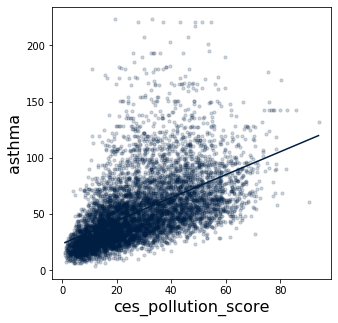

In [15]:
print('r: ', correlation(clean_ces_data, 'ces_pollution_score', 'asthma'))
clean_ces_data.scatter("ces_pollution_score", "asthma", fit_line=True, alpha = .18, s = 10)

Using the `correlation` function we defined above, we calculate the correlation coefficient (printed above the graph).

**Question:** What does this correlation value tell us about the relationship between pollution score and asthma prevalance?

*Your Answer Here*

r-squared:  0.29727296071585657


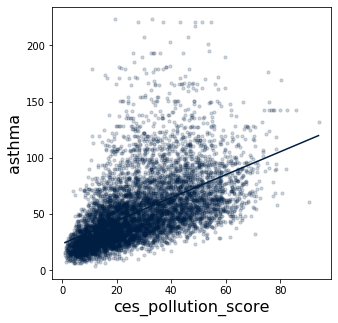

In [16]:
print('r-squared: ', correlation(clean_ces_data, 'ces_pollution_score', 'asthma')**2)
clean_ces_data.scatter("ces_pollution_score", "asthma", fit_line=True, alpha = .18, s = 10)

**correlation coefficient:**

As we would assume, pollution score is correlated with asthma. But `r = 0.545` isn't a very strong relationship. Why? Think back to the example when `r` is nearly perfect: all the points in the scatter plot were almost in a perfect straight line. Does the above look like a near perfect straight line?

No. Even though this plot is clearly exhibiting a positive relationship between the two variables, the scatter plot sprays out: for a given pollution score, there is a pretty wide range of possible asthma occurences. So, while we know that an increase in pollution score tends to increase the number of asthma attacks, we can't predict with much confidence exactly how many attacks there might be. 


The regression line is drawn over the scatter plot to show the best "guess" for asthma prevalence given a particular pollution score.


**r-squared:**

Now looking at the regression line, how can we assess how predictive our model (line) actually is? We turn to `r-squared`, a metric we use to measure how well the prediction line fits in with the scatter plot. 

Take a look at when the pollution score is equal to 40, for example. The regression line predicts somewhere around 60 asthma incidents, but there have been as many as 200 incidents in several census tracts and as few as 20 in others. In other words, the data is super spread out and not centered around the prediction line. **Knowing the pollution score, therefore, doen't give us very much power to predict Asthma.** This is what the r-squared tells us: it helps us assess the effectiveness of our predictive model.

Run the cell below to find the value of r-squared for the above plot.

In [17]:
model = sm.ols(formula='asthma ~ ces_pollution_score', data = clean_ces_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.297
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     3196.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:42:00   Log-Likelihood:                -35167.
No. Observations:                7557   AIC:                         7.034e+04
Df Residuals:                    7555   BIC:                         7.035e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              23.6567      0.589     40.196      0.000      22.503      24.810
ces_pollution_score     1.0217      0.018     56.533      0.000       0.986       1.057
==============================================================================
Omnibus:                     3021.143   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15029.260
Skew:                           1.888   Prob(JB):                         0.00
Kurtosis:                       8.786   Cond. No.                         65.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
.5452*.5452

0.29724304

We get that `r-squared = 0.297`. Recall that r-squared, similarly to the correlation coefficient, is a number between 0 and 1, where 1 indicates the model produces a perfect prediction, and 0 indicates that you're just as well off taking a wild guess. Notice also that:

$r\_squared = 0.297 = 0.5452^2 = (correlation\_coefficient)^2$

In **simple** linear regression, the `r-squared` metric is simply the square of the correlation coefficient! So why use `r-squared` when we already know `r`? Because `r` helps us understand the relationship between two variables, but once we start looking at 3 or more variables at a time we must turn to another metric: the `r-squared`. In fact, `r-squared` is often called the Multiple Correlation Coefficient (the correlation coefficient between multiple variables). It allows us to compare prediction results even if we don't use the same number of variables. We'll come back to this in the last section on Multiple Regression.


### African American (%) vs. Asthma<a id='subsection_5'></a>

r:  0.4986847676603604


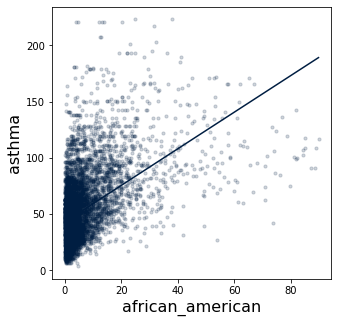

In [19]:
print('r: ', correlation(clean_ces_data, 'african_american', 'asthma'))
clean_ces_data.scatter("african_american", "asthma", fit_line=True, alpha = .18, s = 10)

In [20]:
model = sm.ols(formula='asthma ~ african_american', data = clean_ces_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     2501.
Date:                Wed, 25 Mar 2020   Prob (F-statistic):               0.00
Time:                        09:42:02   Log-Likelihood:                -35420.
No. Observations:                7557   AIC:                         7.084e+04
Df Residuals:                    7555   BIC:                         7.086e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           43.0323      0.357    120.556      0.000      42.333      43.732
african_american     1.6268      0.033     50.007      0.000       1.563       1.691
==============================================================================
Omnibus:                     1877.813   Durbin-Watson:                   1.563
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6012.645
Skew:                           1.257   Prob(JB):                         0.00
Kurtosis:                       6.574   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:**
- Interpret your correlation coefficient
- Interpret your graph -- do you notice anything interesting?
- Interpret the r-squared value

*Your Answer Here:*

- 
- 
- 

---

# Your Turn!!<a id='subsection_6'></a>

Run the cell below to look at all the possible variables available to you to choose from. From this table, choose **one** Health Outcome variable (this will be your Y variable), **one** Environmental Factor Variable, and **one** Race (%) variable. Conduct Simple Regression Analysis of Health Outcome and each of the other two variables, just as we did in the example above.

*Note in the table below that you can scroll to the right to see all the columns.*

In [21]:
clean_ces_data.show(5)

census_tract,hispanic,white,african_american,native_american,asian_american,other,unemployment,poverty,ces_pollution_score,ozone,pesticides,tox_release,asthma,cardiovascular_disease,low_birth_weight
6.019e+09,65.3,4.2,24.6,0.5,3.5,1.8,17.6,76.3,94.09,0.065,2.75,18552,131.64,14.13,7.44
6.071e+09,91.1,5.8,0.7,0.3,1.4,0.7,12.3,72.5,90.68,0.062,1.37,7494.24,60.66,12.94,7.04
6.019e+09,63.6,5.3,18.9,0.6,9.8,1.8,16.1,86.8,85.97,0.062,3.03,12454.9,142.12,14.96,10.16
6.077e+09,57.4,6,12.5,0.3,20.9,2.8,19.6,61.3,82.49,0.046,12.93,2387.78,142.17,14.72,6.23
6.019e+09,71.8,21.4,1.2,0.5,4.5,0.6,18.6,66.4,82.03,0.065,3518.41,21790.7,90.48,12.82,4.5


### 1. Environmental Factor vs. Health Outcome (Single Regression)

In [25]:
# Calculate your the correlation coefficient here
correlation(clean_ces_data, "ozone", "asthma")

0.30625926845248164

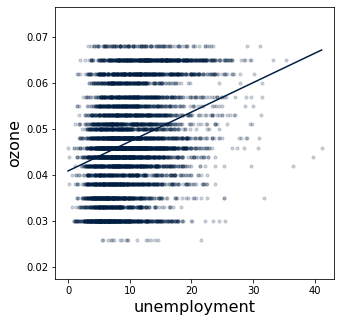

In [26]:
# Plot your scatter plot and regression line here
clean_ces_data.scatter("ozone", "asthma", fit_line=True, alpha = .18, s = 10)

In [30]:
# Fill in the ...
model = sm.ols(formula="asthma ~ ozone", data = clean_ces_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 asthma   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     33.17
Date:                Wed, 25 Mar 2020   Prob (F-statistic):           8.76e-09
Time:                        09:45:33   Log-Likelihood:                -36483.
No. Observations:                7557   AIC:                         7.297e+04
Df Residuals:                    7555   BIC:                         7.298e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     43.2363      1.652     26.171      0.000      39.998      46.475
ozone        196.2304     34.070      5.760      0.000     129.444     263.016
==============================================================================
Omnibus:                     2229.763   Durbin-Watson:                   1.437
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6661.870
Skew:                           1.533   Prob(JB):                         0.00
Kurtosis:                       6.429   Cond. No.                         98.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:**
- Interpret your correlation coefficient
- Interpret your graph -- do you notice anything interesting?
- Interpret the r-squared

*Your Answer Here:*

- 
- 
- 

### 2. % Race vs. Health Outcome (Single Regression)

In [31]:
# Calculate your the correlation coefficient here
correlation(clean_ces_data, "hispanic", "cardiovascular_disease")

0.40265259278257737

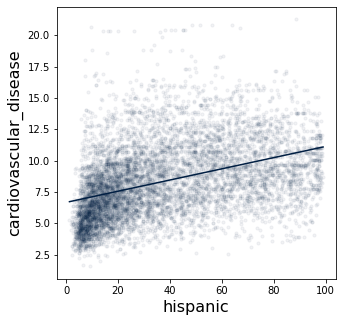

In [34]:
# Plot your scatter plot and regression line here
clean_ces_data.scatter("hispanic", "cardiovascular_disease", fit_line=True, alpha = .05, s = 10)

In [35]:
# Fill in the ...
model = sm.ols(formula='cardiovascular_disease ~ hispanic', data = clean_ces_data)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     cardiovascular_disease   R-squared:                       0.162
Model:                                OLS   Adj. R-squared:                  0.162
Method:                     Least Squares   F-statistic:                     1462.
Date:                    Wed, 25 Mar 2020   Prob (F-statistic):          1.44e-292
Time:                            09:47:12   Log-Likelihood:                -18172.
No. Observations:                    7557   AIC:                         3.635e+04
Df Residuals:                        7555   BIC:                         3.636e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.6631      0.053    124.994      0.000       6.559       6.768
hispanic       0.0447      0.001     38.235      0.000       0.042       0.047
==============================================================================
Omnibus:                      851.409   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1340.771
Skew:                           0.811   Prob(JB):                    7.17e-292
Kurtosis:                       4.276   Cond. No.                         78.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question:**
- Interpret your correlation coefficient
- Interpret your graph -- do you notice anything interesting?
- Interpret the r-squared

*Your Answer Here:*

- 
- 
- 

So you see that linear regression of two variables (X and Y) is really just a line that goes through the scatter plot in a way that gives us the best estimate of what the Y value might be given an X value. If we are told that a Census Tract is made up 100% of Hispanics, looking at the plot above our prediction of frequency of Asthma attacks for that Census tract would be about 75; if we are told that a Census Tract has 0% Hispanics, our prediction would be a little less than 50. This is what the regression line allows us to do -- it allows us to see how one variable (X, i.e. % Hispanic) affects another variable (Y, i.e. number of asthma attacks), what the magnitude of this effect is, and, ultimately, it allows us to make predictions based on what we know about X.


#### Citations:

- [DS Modules](https://github.com/ds-modules)
- Pierce, Rod. "Correlation" Math Is Fun. Ed. Rod Pierce. 5 Nov 2018. 16 Feb 2019 <http://www.mathsisfun.com/data/correlation.html>
- Regression Image: Online Statistics Education: A Multimedia Course of Study (http://onlinestatbook.com/)


*Notebook developed by: Aarish Irfan and Keiko Kamei*